In [5]:
!pip install geosketch
!pip install magic-impute

  Created wheel for geosketch: filename=geosketch-1.0-cp37-none-any.whl size=7237 sha256=bd1e410d3e6bbc3a2f281301f958583d3f11fd6237f33b8e080408bffa5fcde0
  Stored in directory: /home/utilisateur/.cache/pip/wheels/e8/bc/0c/b12c3566c2d605fe880bf658e935f5c66e00f484b9465c7b26
  Created wheel for fbpca: filename=fbpca-1.0-cp37-none-any.whl size=11376 sha256=f4b2ccea773a0fb191092a01ca7ed803a31a9e47c7ec5675828d7ea8894326b7
  Stored in directory: /home/utilisateur/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
Successfully built geosketch fbpca


In [10]:
import magic
import scprep
import geosketch
import skhubness
from fbpca import pca
import pandas as pd
import matplotlib.pyplot as plt

Calculating MAGIC...
  Running MAGIC on 500 cells and 197 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/home/utilisateur/.local/lib/python3.7/site-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


    Calculated PCA in 0.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.11 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.96 seconds.
  Calculating imputation...
Calculated MAGIC in 0.98 seconds.


/home/utilisateur/.local/lib/python3.7/site-packages/graphtools/graphs.py:282: RuntimeWarning: Detected zero distance between samples 0 and 74, 26 and 109, 60 and 389, 68 and 167, 118 and 461, 218 and 427, 296 and 345, 372 and 387. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


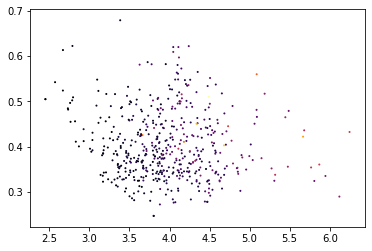

In [5]:
# Magic example
X = pd.read_csv("../data/test_data.csv")
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(X, genes=['VIM', 'CDH1', 'ZEB1'])
plt.scatter(X_magic['VIM'], X_magic['CDH1'], c=X_magic['ZEB1'], s=1, cmap='inferno')
plt.show()
magic.plot.animate_magic(X, gene_x='VIM', gene_y='CDH1', gene_color='ZEB1', operator=magic_operator)

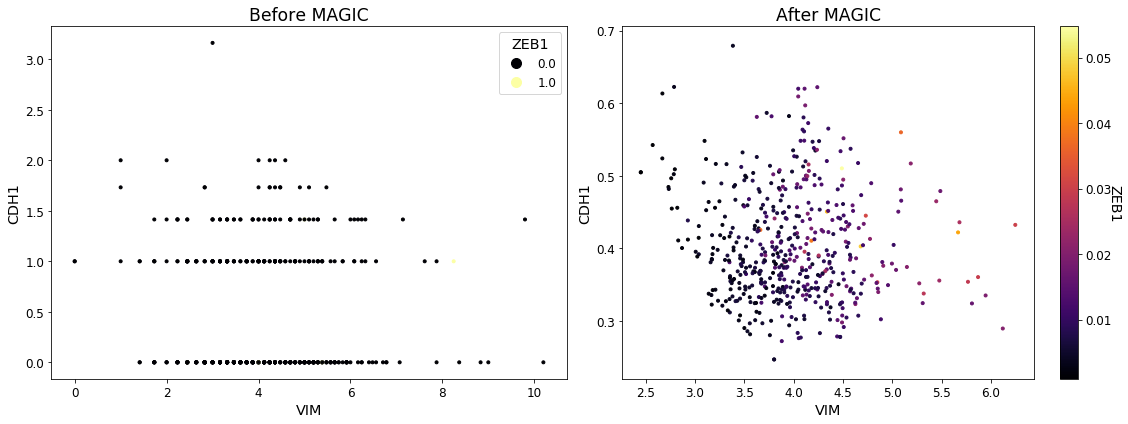

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=X['VIM'], y=X['CDH1'], c=X['ZEB1'],  ax=ax1,
                    xlabel='VIM', ylabel='CDH1', legend_title="ZEB1", title='Before MAGIC', cmap=plt.cm.inferno)

scprep.plot.scatter(x=X_magic['VIM'], y=X_magic['CDH1'], c=X_magic['ZEB1'], ax=ax2,
                    xlabel='VIM', ylabel='CDH1', legend_title="ZEB1", title='After MAGIC')

plt.tight_layout()
plt.show()

In [15]:
magic_operator = magic.MAGIC(verbose=0)
X_magic = magic_operator.fit_transform(X, genes='all_genes')

hub = skhubness.Hubness(k=10, metric='cosine')
hub.fit(X)
k_skew = hub.score()
print(f'Skewness = {k_skew:.3f}')
print(f'Robin hood index: {hub.robinhood_index:.3f}')
print(f'Antihub occurrence: {hub.antihub_occurrence:.3f}')
print(f'Hub occurrence: {hub.hub_occurrence:.3f}')
print('\n\n')

hub.fit(X_magic)
k_skew = hub.score()
print(f'Skewness = {k_skew:.3f}')
print(f'Robin hood index: {hub.robinhood_index:.3f}')
print(f'Antihub occurrence: {hub.antihub_occurrence:.3f}')
print(f'Hub occurrence: {hub.hub_occurrence:.3f}')

/home/utilisateur/.local/lib/python3.7/site-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "
/home/utilisateur/.local/lib/python3.7/site-packages/graphtools/graphs.py:282: RuntimeWarning: Detected zero distance between samples 0 and 74, 26 and 109, 60 and 389, 68 and 167, 118 and 461, 218 and 427, 296 and 345, 372 and 387. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


Skewness = 4.050
Robin hood index: 0.494
Antihub occurrence: 0.170
Hub occurrence: 0.588



Skewness = 2.663
Robin hood index: 0.369
Antihub occurrence: 0.006
Hub occurrence: 0.428


In [13]:
# geosketch

X_np=X.to_numpy()
# Compute PCs
U, s, Vt = pca(X_np, k=100) # E.g., 100 PCs.
X_dimred = U[:, :100] * s[:100]
# Sketch
N = 200 # Number of samples to obtain from the data set
sketch_index = geosketch.gs(X_dimred, N, replace=False)

X_sketch = X_dimred[sketch_index]